In [29]:
import os
#Specify whether to use CHEESEHEAD or synthtic data 
os.environ['config'] = 'CHEESEHEAD'
# os.environ['config'] = 'synthetic'

from setup import * #Import setup module
from chad_funcs import *
import h5py
import re
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
from pyproj import Proj, transform

# import pdb #Add to setup if I'm going to use this often

# #If using limited cases- full case list read in through setup module
# cases = pd.read_csv('../Inputs/cases_limited.csv', index_col = 'case') #dataframe of tower coordinates

In [ ]:

# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019297.h11v04.002.2023004174607/VNP15A2H.A2019297.h11v04.002.2023004174607.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019289.h11v04.002.2023004144939/VNP15A2H.A2019289.h11v04.002.2023004144939.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019281.h11v04.002.2023004122709/VNP15A2H.A2019281.h11v04.002.2023004122709.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019273.h11v04.002.2023004101444/VNP15A2H.A2019273.h11v04.002.2023004101444.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019265.h11v04.002.2023004072012/VNP15A2H.A2019265.h11v04.002.2023004072012.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019257.h11v04.002.2023004050642/VNP15A2H.A2019257.h11v04.002.2023004050642.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019249.h11v04.002.2023004025528/VNP15A2H.A2019249.h11v04.002.2023004025528.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019241.h11v04.002.2023004003528/VNP15A2H.A2019241.h11v04.002.2023004003528.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019233.h11v04.002.2023003224511/VNP15A2H.A2019233.h11v04.002.2023003224511.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019225.h11v04.002.2023003203300/VNP15A2H.A2019225.h11v04.002.2023003203300.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019217.h11v04.002.2023003183336/VNP15A2H.A2019217.h11v04.002.2023003183336.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019209.h11v04.002.2023003162526/VNP15A2H.A2019209.h11v04.002.2023003162526.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019201.h11v04.002.2023003150732/VNP15A2H.A2019201.h11v04.002.2023003150732.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019193.h11v04.002.2023003135600/VNP15A2H.A2019193.h11v04.002.2023003135600.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019185.h11v04.002.2023003125355/VNP15A2H.A2019185.h11v04.002.2023003125355.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019177.h11v04.002.2023003121850/VNP15A2H.A2019177.h11v04.002.2023003121850.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019169.h11v04.002.2022351145840/VNP15A2H.A2019169.h11v04.002.2022351145840.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019161.h11v04.002.2022350122210/VNP15A2H.A2019161.h11v04.002.2022350122210.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019153.h11v04.002.2022349083118/VNP15A2H.A2019153.h11v04.002.2022349083118.h5
# https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP15A2H.002/VNP15A2H.A2019145.h11v04.002.2022348061548/VNP15A2H.A2019145.h11v04.002.2022348061548.h5

In [88]:

filelist = ['VNP15A2H.A2019297.h11v04.002.2023004174607.h5', 
            'VNP15A2H.A2019289.h11v04.002.2023004144939.h5',
            'VNP15A2H.A2019281.h11v04.002.2023004122709.h5',
            'VNP15A2H.A2019273.h11v04.002.2023004101444.h5',
            'VNP15A2H.A2019265.h11v04.002.2023004072012.h5',
            'VNP15A2H.A2019257.h11v04.002.2023004050642.h5',
            'VNP15A2H.A2019249.h11v04.002.2023004025528.h5',
            'VNP15A2H.A2019241.h11v04.002.2023004003528.h5',
            'VNP15A2H.A2019233.h11v04.002.2023003224511.h5',
            'VNP15A2H.A2019225.h11v04.002.2023003203300.h5',
            'VNP15A2H.A2019217.h11v04.002.2023003183336.h5',
            'VNP15A2H.A2019209.h11v04.002.2023003162526.h5',
            'VNP15A2H.A2019201.h11v04.002.2023003150732.h5',
            'VNP15A2H.A2019193.h11v04.002.2023003135600.h5',
            'VNP15A2H.A2019185.h11v04.002.2023003125355.h5',
            'VNP15A2H.A2019177.h11v04.002.2023003121850.h5',
            'VNP15A2H.A2019169.h11v04.002.2022351145840.h5',
            'VNP15A2H.A2019161.h11v04.002.2022350122210.h5',
            'VNP15A2H.A2019153.h11v04.002.2022349083118.h5',
            'VNP15A2H.A2019145.h11v04.002.2022348061548.h5']

In [42]:
# file_path = '../Inputs/LAI_data/VNP15A2H.A2019289.h11v04.002.2023004144939.h5'

# with h5py.File(file_path, "r") as f:
#     # Explore the file structure
#     print(f.keys())  # List the top-level groups/datasets

#     # Access a specific dataset
#     # dataset_name = '/HDFEOS/GRIDS/VIIRS_Grid_LAIFPAR/Data Fields/Lai'
#     dataset_name = '/HDFEOS INFORMATION/HDFEOSVersion/'
#     dataset = f[dataset_name]
#     print(dataset)
#     # print(dataset.shape)# Get the shape of the dataset

#     # Access attributes
#     print(dataset.attrs.keys())  # List dataset attributes
#     print(dataset.attrs["units"])  # Access a specific attribute
#     print(dataset.attrs['add_offset'])

In [115]:
GRID_NAME = 'VIIRS_Grid_LAIFPAR'
DATAFIELD_NAME = 'Lai'

LAI_raw = pd.DataFrame(columns = tc.index)

for FILE_NAME in filelist:
    DOY = FILE_NAME[14:17] #Day of year
    FILE_PATH = '../Inputs/LAI_data/' + FILE_NAME
    print(DOY)
    
    with h5py.File(FILE_PATH, mode='r') as f:        
        name = '/HDFEOS/GRIDS/{0}/Data Fields/{1}'.format(GRID_NAME,
                                                          DATAFIELD_NAME)
        
        data = f[name][:].astype(np.float64)

        # Read attributes.
        scale = f[name].attrs['scale_factor']
        offset = f[name].attrs['add_offset']
        fill_value = f[name].attrs['_FillValue']

        # Read metadata. 
        gridmeta = f['/HDFEOS INFORMATION/StructMetadata.0'][()]
        s = gridmeta.decode('UTF-8')

        # Construct the grid.  The needed information is in a string dataset
        # called 'StructMetadata.0'.  Use regular expressions to retrieve
        # extents of the grid. 
        ul_regex = re.compile(r'''UpperLeftPointMtrs=\(
        (?P<upper_left_x>[+-]?\d+\.\d+)
        ,
        (?P<upper_left_y>[+-]?\d+\.\d+)
        \)''', re.VERBOSE)
        match = ul_regex.search(s)
        x0 = float(match.group('upper_left_x')) 
        y0 = float(match.group('upper_left_y')) 
        lr_regex = re.compile(r'''LowerRightMtrs=\(
        (?P<lower_right_x>[+-]?\d+\.\d+)
        ,
        (?P<lower_right_y>[+-]?\d+\.\d+)
        \)''', re.VERBOSE)
        match = lr_regex.search(s)
        x1 = np.float64(match.group('lower_right_x'))
        y1 = np.float64(match.group('lower_right_y'))
        ny, nx = data.shape
        x = np.linspace(x0, x1, nx, endpoint=False)
        y = np.linspace(y0, y1, ny, endpoint=False)
        xv, yv = np.meshgrid(x, y)

        # Define the sinusoidal projection (specific to VIIRS/MODIS)
        sin_proj = Proj(proj='sinu', R=6371007.181)

        # Transform grid coordinates to lat/lon
        lon, lat = sin_proj(xv, yv, inverse=True)


        # Apply fill value and scale factor.
        data[(data >= 249) & (data <= 255)] = np.nan
        data = scale * data + offset
        data = np.ma.masked_array(data, np.isnan(data))
        
        for tow in tc.index:
            # Define the target latitude and longitude (replace with your specific values)
            target_lat = tc.loc[tow].Lat
            target_lon = tc.loc[tow].Lon  # Example: 120°W

            # Compute the absolute differences between the target and grid points
            lat_diff = np.abs(lat - target_lat)
            lon_diff = np.abs(lon - target_lon)

            # Find the index of the closest pixel
            closest_index = np.unravel_index((lat_diff + lon_diff).argmin(), lat.shape)

            # Extract the LAI value for the closest pixel
            lai_value = data[closest_index]
                        
#             print(f"Closest pixel indices: {closest_index}")
#             print(f"Latitude of pixel: {lat[closest_index]}")
#             print(f"Longitude of pixel: {lon[closest_index]}")
            # print(f"LAI value at closest pixel: {lai_value}")

            
            LAI_raw.loc[DOY, tow] = lai_value
            
LAI_raw = LAI_raw.apply(pd.to_numeric, errors='coerce')

297
289
281
273
265
257
249
241
233
225
217
209
201
193
185
177
169
161
153
145


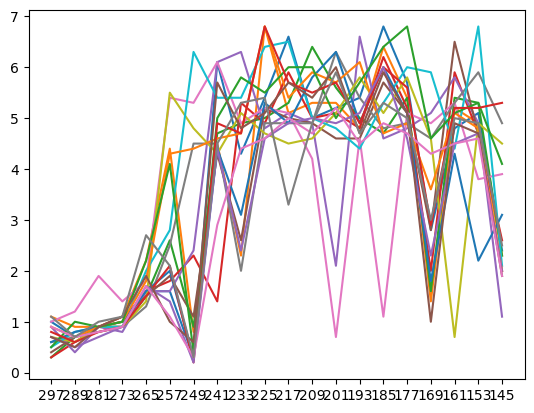

In [116]:
plt.plot(LAI_raw);

In [121]:
year = 2019
hour = 12
# Convert DOY index to datetime
LAI_raw.index = pd.to_datetime(LAI_raw.index, format='%j', yearfirst=True) + pd.DateOffset(year=2019, hour=12, minute=0)
LAI_hh = LAI_raw.resample('30min').interpolate(method='linear')  # Linear interpolation

LAI_hh
a_from_lai = LAI_hh/2

In [122]:
a_from_lai.to_pickle(intermed_filepath + 'a_from_lai.pickle')

Closest pixel indices: (973, 1735)
Latitude of pixel: 45.94583332920669
Longitude of pixel: -90.2738280005548
LAI value at closest pixel: 6.6000000000000005


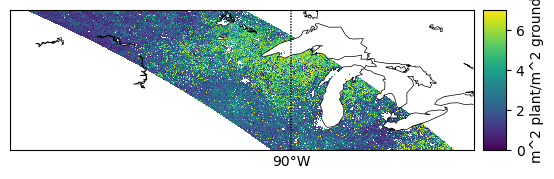

In [89]:
# GRID_NAME = 'VIIRS_Grid_LAIFPAR'
# DATAFIELD_NAME = 'Lai'
# FILE_NAME =  '../Inputs/LAI_data/' + filelist[10]
    
# with h5py.File(FILE_NAME, mode='r') as f:        
#     name = '/HDFEOS/GRIDS/{0}/Data Fields/{1}'.format(GRID_NAME,
#                                                       DATAFIELD_NAME)
#     data = f[name][:].astype(np.float64)
#     # Read attributes.
#     scale = f[name].attrs['scale_factor']
#     offset = f[name].attrs['add_offset']
#     units = f[name].attrs['units'].decode()
#     fill_value = f[name].attrs['_FillValue']
#     long_name = f[name].attrs['long_name'].decode()

#     # Read metadata. 
#     gridmeta = f['/HDFEOS INFORMATION/StructMetadata.0'][()]
#     s = gridmeta.decode('UTF-8')

#     # Construct the grid.  The needed information is in a string dataset
#     # called 'StructMetadata.0'.  Use regular expressions to retrieve
#     # extents of the grid. 
#     ul_regex = re.compile(r'''UpperLeftPointMtrs=\(
#     (?P<upper_left_x>[+-]?\d+\.\d+)
#     ,
#     (?P<upper_left_y>[+-]?\d+\.\d+)
#     \)''', re.VERBOSE)
#     match = ul_regex.search(s)
#     x0 = float(match.group('upper_left_x')) 
#     y0 = float(match.group('upper_left_y')) 
#     lr_regex = re.compile(r'''LowerRightMtrs=\(
#     (?P<lower_right_x>[+-]?\d+\.\d+)
#     ,
#     (?P<lower_right_y>[+-]?\d+\.\d+)
#     \)''', re.VERBOSE)
#     match = lr_regex.search(s)
#     x1 = np.float64(match.group('lower_right_x'))
#     y1 = np.float64(match.group('lower_right_y'))
#     ny, nx = data.shape
#     x = np.linspace(x0, x1, nx, endpoint=False)
#     y = np.linspace(y0, y1, ny, endpoint=False)
#     xv, yv = np.meshgrid(x, y)

#     # Define the sinusoidal projection (specific to VIIRS/MODIS)
#     sin_proj = Proj(proj='sinu', R=6371007.181)

#     # Transform grid coordinates to lat/lon
#     lon, lat = sin_proj(xv, yv, inverse=True)


#     # Apply fill value and scale factor.
#     data[(data >= 249) & (data <= 255)] = np.nan
#     data = scale * data + offset
#     data = np.ma.masked_array(data, np.isnan(data))
    
#     m = Basemap(projection='cyl', resolution='l',
#                 llcrnrlat=40, urcrnrlat = 50,
#                 llcrnrlon=-110, urcrnrlon = -77)
#     m.drawcoastlines(linewidth=0.5)
#     m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
#     m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])

#     m.pcolormesh(lon, lat, data, latlon=True)
#     cb = m.colorbar()
#     cb.set_label(units)

#     # Define the target latitude and longitude (replace with your specific values)
#     target_lat = 45.9459  # Example: 35°N
#     target_lon = -90.2723  # Example: 120°W

#     # Compute the absolute differences between the target and grid points
#     lat_diff = np.abs(lat - target_lat)
#     lon_diff = np.abs(lon - target_lon)

#     # Find the index of the closest pixel
#     closest_index = np.unravel_index((lat_diff + lon_diff).argmin(), lat.shape)

#     # Extract the LAI value for the closest pixel
#     lai_value = data[closest_index]

#     # Output the results
#     print(f"Closest pixel indices: {closest_index}")
#     print(f"Latitude of pixel: {lat[closest_index]}")
#     print(f"Longitude of pixel: {lon[closest_index]}")
#     print(f"LAI value at closest pixel: {lai_value}")



In [84]:
# GRID_NAME = 'VIIRS_Grid_LAIFPAR'
# DATAFIELD_NAME = 'Lai'

# for FILENAME in filelist:
    
#     with h5py.File(FILE_NAME, mode='r') as f:        
#         name = '/HDFEOS/GRIDS/{0}/Data Fields/{1}'.format(GRID_NAME,
#                                                           DATAFIELD_NAME)
#         data = f[name][:].astype(np.float64)
#         # Read attributes.
#         scale = f[name].attrs['scale_factor']
#         offset = f[name].attrs['add_offset']
#         units = f[name].attrs['units'].decode()
#         fill_value = f[name].attrs['_FillValue']
#         long_name = f[name].attrs['long_name'].decode()

#         # Read metadata. 
#         gridmeta = f['/HDFEOS INFORMATION/StructMetadata.0'][()]
#         s = gridmeta.decode('UTF-8')

#         # Construct the grid.  The needed information is in a string dataset
#         # called 'StructMetadata.0'.  Use regular expressions to retrieve
#         # extents of the grid. 
#         ul_regex = re.compile(r'''UpperLeftPointMtrs=\(
#         (?P<upper_left_x>[+-]?\d+\.\d+)
#         ,
#         (?P<upper_left_y>[+-]?\d+\.\d+)
#         \)''', re.VERBOSE)
#         match = ul_regex.search(s)
#         x0 = float(match.group('upper_left_x')) 
#         y0 = float(match.group('upper_left_y')) 
#         lr_regex = re.compile(r'''LowerRightMtrs=\(
#         (?P<lower_right_x>[+-]?\d+\.\d+)
#         ,
#         (?P<lower_right_y>[+-]?\d+\.\d+)
#         \)''', re.VERBOSE)
#         match = lr_regex.search(s)
#         x1 = np.float64(match.group('lower_right_x'))
#         y1 = np.float64(match.group('lower_right_y'))
#         ny, nx = data.shape
#         x = np.linspace(x0, x1, nx, endpoint=False)
#         y = np.linspace(y0, y1, ny, endpoint=False)
#         xv, yv = np.meshgrid(x, y)

#         # Define the sinusoidal projection (specific to VIIRS/MODIS)
#         sin_proj = Proj(proj='sinu', R=6371007.181)

#         # Transform grid coordinates to lat/lon
#         lon, lat = sin_proj(xv, yv, inverse=True)


#         # Apply fill value and scale factor.
#         data[(data >= 249) & (data <= 255)] = np.nan
#         data = scale * data + offset
#         data = np.ma.masked_array(data, np.isnan(data))

#         # Define the target latitude and longitude (replace with your specific values)
#         target_lat = 45.9459  # Example: 35°N
#         target_lon = -90.2723  # Example: 120°W

#         # Compute the absolute differences between the target and grid points
#         lat_diff = np.abs(lat - target_lat)
#         lon_diff = np.abs(lon - target_lon)

#         # Find the index of the closest pixel
#         closest_index = np.unravel_index((lat_diff + lon_diff).argmin(), lat.shape)

#         # Extract the LAI value for the closest pixel
#         lai_value = data[closest_index]

#         # Output the results
#         print(f"Closest pixel indices: {closest_index}")
#         print(f"Latitude of pixel: {lat[closest_index]}")
#         print(f"Longitude of pixel: {lon[closest_index]}")
#         print(f"LAI value at closest pixel: {lai_value}")
        
#         m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=40, urcrnrlat = 50,
#             llcrnrlon=-110, urcrnrlon = -77)
#     m.drawcoastlines(linewidth=0.5)
#     m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
#     m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])

#     m.pcolormesh(lon, lat, data, latlon=True)
#     cb = m.colorbar()
#     cb.set_label(units)


In [146]:
filepath = output_filepath + 'adv_final/LE_hrz_all_lai.pickle'
LE_hrz_lai = pd.read_pickle(filepath)

filepath = output_filepath + 'adv_final/LE_hrz_all.pickle'
LE_hrz = pd.read_pickle(filepath)




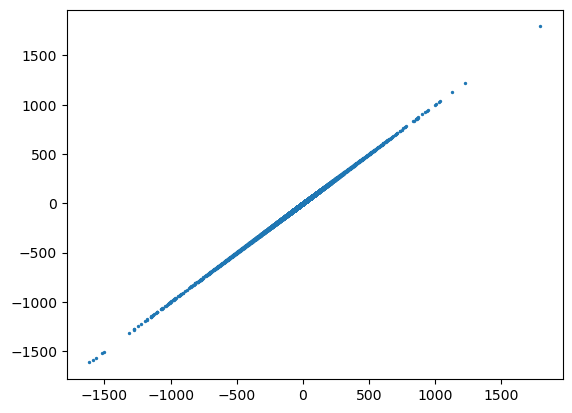

In [151]:
plt.scatter(vert_cont['H'], vert_cont_lai['H'], s = 2)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

In [148]:
Vert_cont

var                   H                                                      \
tow                 PFA PFb       PFc PFd PFe PFg PFh PFi PFj       PFk PFl   
TIMESTAMP_START                                                               
2019-06-20 00:00:00 NaN NaN       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
2019-06-20 00:30:00 NaN NaN       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
2019-06-20 01:00:00 NaN NaN       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
2019-06-20 01:30:00 NaN NaN       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
2019-06-20 02:00:00 NaN NaN       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
...                  ..  ..       ...  ..  ..  ..  ..  ..  ..       ...  ..   
2019-10-13 21:00:00 NaN NaN -2.103199 NaN NaN NaN NaN NaN NaN -4.390982 NaN   
2019-10-13 21:30:00 NaN NaN -0.691339 NaN NaN NaN NaN NaN NaN -2.582778 NaN   
2019-10-13 22:00:00 NaN NaN -0.740911 NaN NaN NaN NaN NaN NaN -4.540262 NaN   
2019-10-13 22:30:00 NaN NaN  0.713729 NaN NaN NaN NaN NaN NaN -6.315175 NaN   
2019-10-13 23:00:00 NaN NaN  0.067607 NaN NaN NaN NaN NaN NaN -5.128779 NaN   

var                                                            LE      \
tow                 PFm        PFn        PFp PFq PFr PFs PFt PFA PFb   
TIMESTAMP_START                                                         
2019-06-20 00:00:00 NaN  20.010375   1.740782 NaN NaN NaN NaN NaN NaN   
2019-06-20 00:30:00 NaN  22.648536  14.484425 NaN NaN NaN NaN NaN NaN   
2019-06-20 01:00:00 NaN  23.347221   3.050989 NaN NaN NaN NaN NaN NaN   
2019-06-20 01:30:00 NaN  26.087457  42.562777 NaN NaN NaN NaN NaN NaN   
2019-06-20 02:00:00 NaN   8.993422 -15.869286 NaN NaN NaN NaN NaN NaN   
...                  ..        ...        ...  ..  ..  ..  ..  ..  ..   
2019-10-13 21:00:00 NaN        NaN        NaN NaN NaN NaN NaN NaN NaN   
2019-10-13 21:30:00 NaN        NaN        NaN NaN NaN NaN NaN NaN NaN   
2019-10-13 22:00:00 NaN        NaN        NaN NaN NaN NaN NaN NaN NaN   
2019-10-13 22:30:00 NaN        NaN        NaN NaN NaN NaN NaN NaN NaN   
2019-10-13 23:00:00 NaN        NaN        NaN NaN NaN NaN NaN NaN NaN   

var                                                                           \
tow                       PFc PFd PFe PFg PFh PFi PFj PFk PFl PFm        PFn   
TIMESTAMP_START                                                                
2019-06-20 00:00:00       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -15.591938   
2019-06-20 00:30:00       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -14.442602   
2019-06-20 01:00:00       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  -4.584059   
2019-06-20 01:30:00       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -11.735296   
2019-06-20 02:00:00       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  -1.894741   
...                       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..        ...   
2019-10-13 21:00:00  3.770552 NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN   
2019-10-13 21:30:00  0.744631 NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN   
2019-10-13 22:00:00  0.833122 NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN   
2019-10-13 22:30:00 -1.359277 NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN   
2019-10-13 23:00:00 -0.546833 NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN   

var                                            
tow                       PFp PFq PFr PFs PFt  
TIMESTAMP_START                                
2019-06-20 00:00:00 -0.008802 NaN NaN NaN NaN  
2019-06-20 00:30:00  0.021036 NaN NaN NaN NaN  
2019-06-20 01:00:00  0.044296 NaN NaN NaN NaN  
2019-06-20 01:30:00  4.500386 NaN NaN NaN NaN  
2019-06-20 02:00:00 -4.674249 NaN NaN NaN NaN  
...                       ...  ..  ..  ..  ..  
2019-10-13 21:00:00       NaN NaN NaN NaN NaN  
2019-10-13 21:30:00       NaN NaN NaN NaN NaN  
2019-10-13 22:00:00       NaN NaN NaN NaN NaN  
2019-10-13 22:30:00       NaN NaN NaN NaN NaN  
2019-10-13 23:00:00       NaN NaN NaN NaN NaN  

[5567 rows x 36 columns]

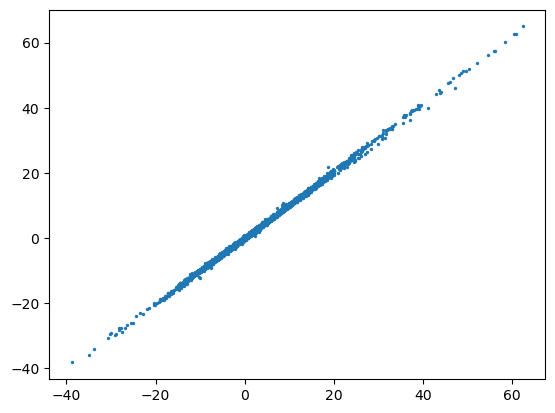

In [140]:
case = 'A'
plt.scatter(LE_hrz_lai[case, 'PFA'],LE_hrz[case, 'PFA'], s = 2 )